### Importing Interest Rate Data


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
df_treas = quandl.get("USTREASURY/YIELD", authtoken="zBYbsY7fujcHokgXQdsY",
    start_date = "2006-01-01", end_date="2019-03-28")

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7315 entries, 1990-01-02 to 2019-03-28
Data columns (total 12 columns):
1 MO     4416 non-null float64
2 MO     111 non-null float64
3 MO     7312 non-null float64
6 MO     7315 non-null float64
1 YR     7315 non-null float64
2 YR     7315 non-null float64
3 YR     7315 non-null float64
5 YR     7315 non-null float64
7 YR     7315 non-null float64
10 YR    7315 non-null float64
20 YR    6376 non-null float64
30 YR    6321 non-null float64
dtypes: float64(12)
memory usage: 742.9 KB


In [6]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16be4898>,
      dtype=object)

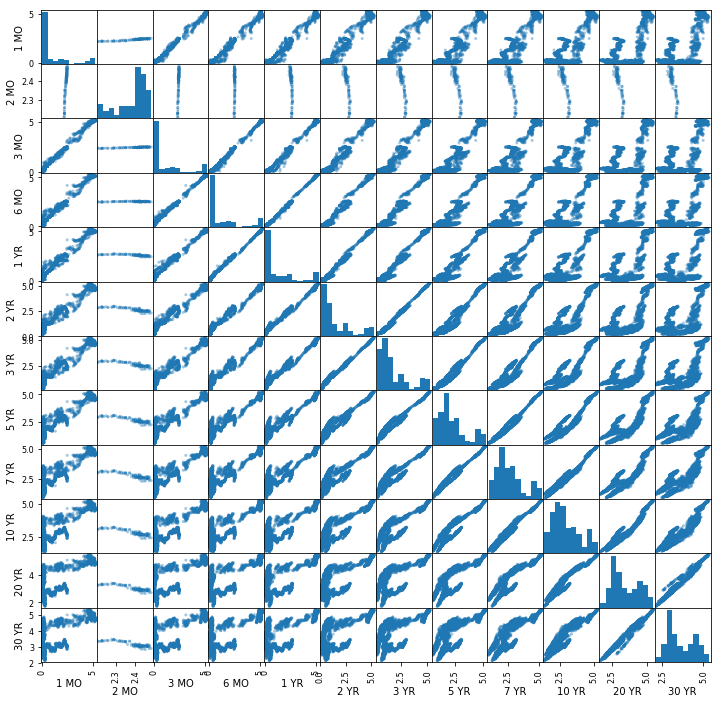

In [7]:
scatter_matrix(df_treas, alpha = 0.4, figsize=(12,12))

In [9]:
df_treas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3313 entries, 2006-01-03 to 2019-03-28
Data columns (total 12 columns):
1 MO     3313 non-null float64
2 MO     111 non-null float64
3 MO     3310 non-null float64
6 MO     3313 non-null float64
1 YR     3313 non-null float64
2 YR     3313 non-null float64
3 YR     3313 non-null float64
5 YR     3313 non-null float64
7 YR     3313 non-null float64
10 YR    3313 non-null float64
20 YR    3313 non-null float64
30 YR    3287 non-null float64
dtypes: float64(12)
memory usage: 336.5 KB


In [8]:
X = df_treas.copy()

## Interesting questions
Do I need to  express these in terms of forward rates instead of levels?
It would make more sense having it be the market's expected path of interest rates rather than some mutted average.

I will just need to remember to transform the data back into yields for the course of prediction

Maybe start a pipeline document that explains the entire process



## To Be Done
Set up web scraping to get a mongoDB goind with the different Fed Speaches
Detemine how to handle the video of speaches
Make sure I map the speaker to the process and the type of speach {transcript, remarks, presentation}



## Interesting extensions
Which type of press release is more important
Which speakers are more important
Which speakers are least similar to actual FOMC documents
Any way to plot  a history of the cosine similary between speakers with their faces on it for an app?
Maybe a timeline of the speaches and their impact?


## Additional variables to consider for the project
Currency rates cut before the speaches - to control for .....
Economic releases that may have also been impactful for the period
Time before new press release
When the dot plots get released

Short term interest rates


# MOST IMPORTANT NEXT STEPS
Get a mongoDB set up and scrape this data


### Now back to the EDA

In [10]:
X.describe()


,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
count,3313.000000,111.000000,3310.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3287.000000
mean,1.089119,2.387117,1.143752,1.252345,1.342668,1.540643,1.759547,2.215077,2.589713,2.938802,3.466085,3.626368
std,1.631714,0.072267,1.650751,1.672018,1.619399,1.478271,1.371656,1.193828,1.065508,0.975903,0.948785,0.812916
min,0.000000,2.210000,0.000000,0.020000,0.080000,0.160000,0.280000,0.560000,0.910000,1.370000,1.690000,2.110000
25%,0.040000,2.350000,0.060000,0.120000,0.190000,0.470000,0.830000,1.400000,1.880000,2.190000,2.680000,2.960000
50%,0.150000,2.410000,0.180000,0.310000,0.490000,0.870000,1.270000,1.840000,2.280000,2.710000,3.190000,3.360000
75%,1.680000,2.440000,1.787500,1.950000,2.120000,2.340000,2.450000,2.730000,3.090000,3.590000,4.360000,4.410000
max,5.270000,2.480000,5.190000,5.330000,5.300000,5.290000,5.260000,5.230000,5.230000,5.260000,5.440000,5.350000


In [11]:
col_names = X.columns
print(col_names)

Index(['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR',
       '10 YR', '20 YR', '30 YR'],
      dtype='object')


In [12]:
X = X.drop(['1 MO', '2 MO', '20 YR', '30 YR'], axis=1)

In [13]:
X.describe()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR
count,3310.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,1.143752,1.252345,1.342668,1.540643,1.759547,2.215077,2.589713,2.938802
std,1.650751,1.672018,1.619399,1.478271,1.371656,1.193828,1.065508,0.975903
min,0.000000,0.020000,0.080000,0.160000,0.280000,0.560000,0.910000,1.370000
25%,0.060000,0.120000,0.190000,0.470000,0.830000,1.400000,1.880000,2.190000
50%,0.180000,0.310000,0.490000,0.870000,1.270000,1.840000,2.280000,2.710000
75%,1.787500,1.950000,2.120000,2.340000,2.450000,2.730000,3.090000,3.590000
max,5.190000,5.330000,5.300000,5.290000,5.260000,5.230000,5.230000,5.260000


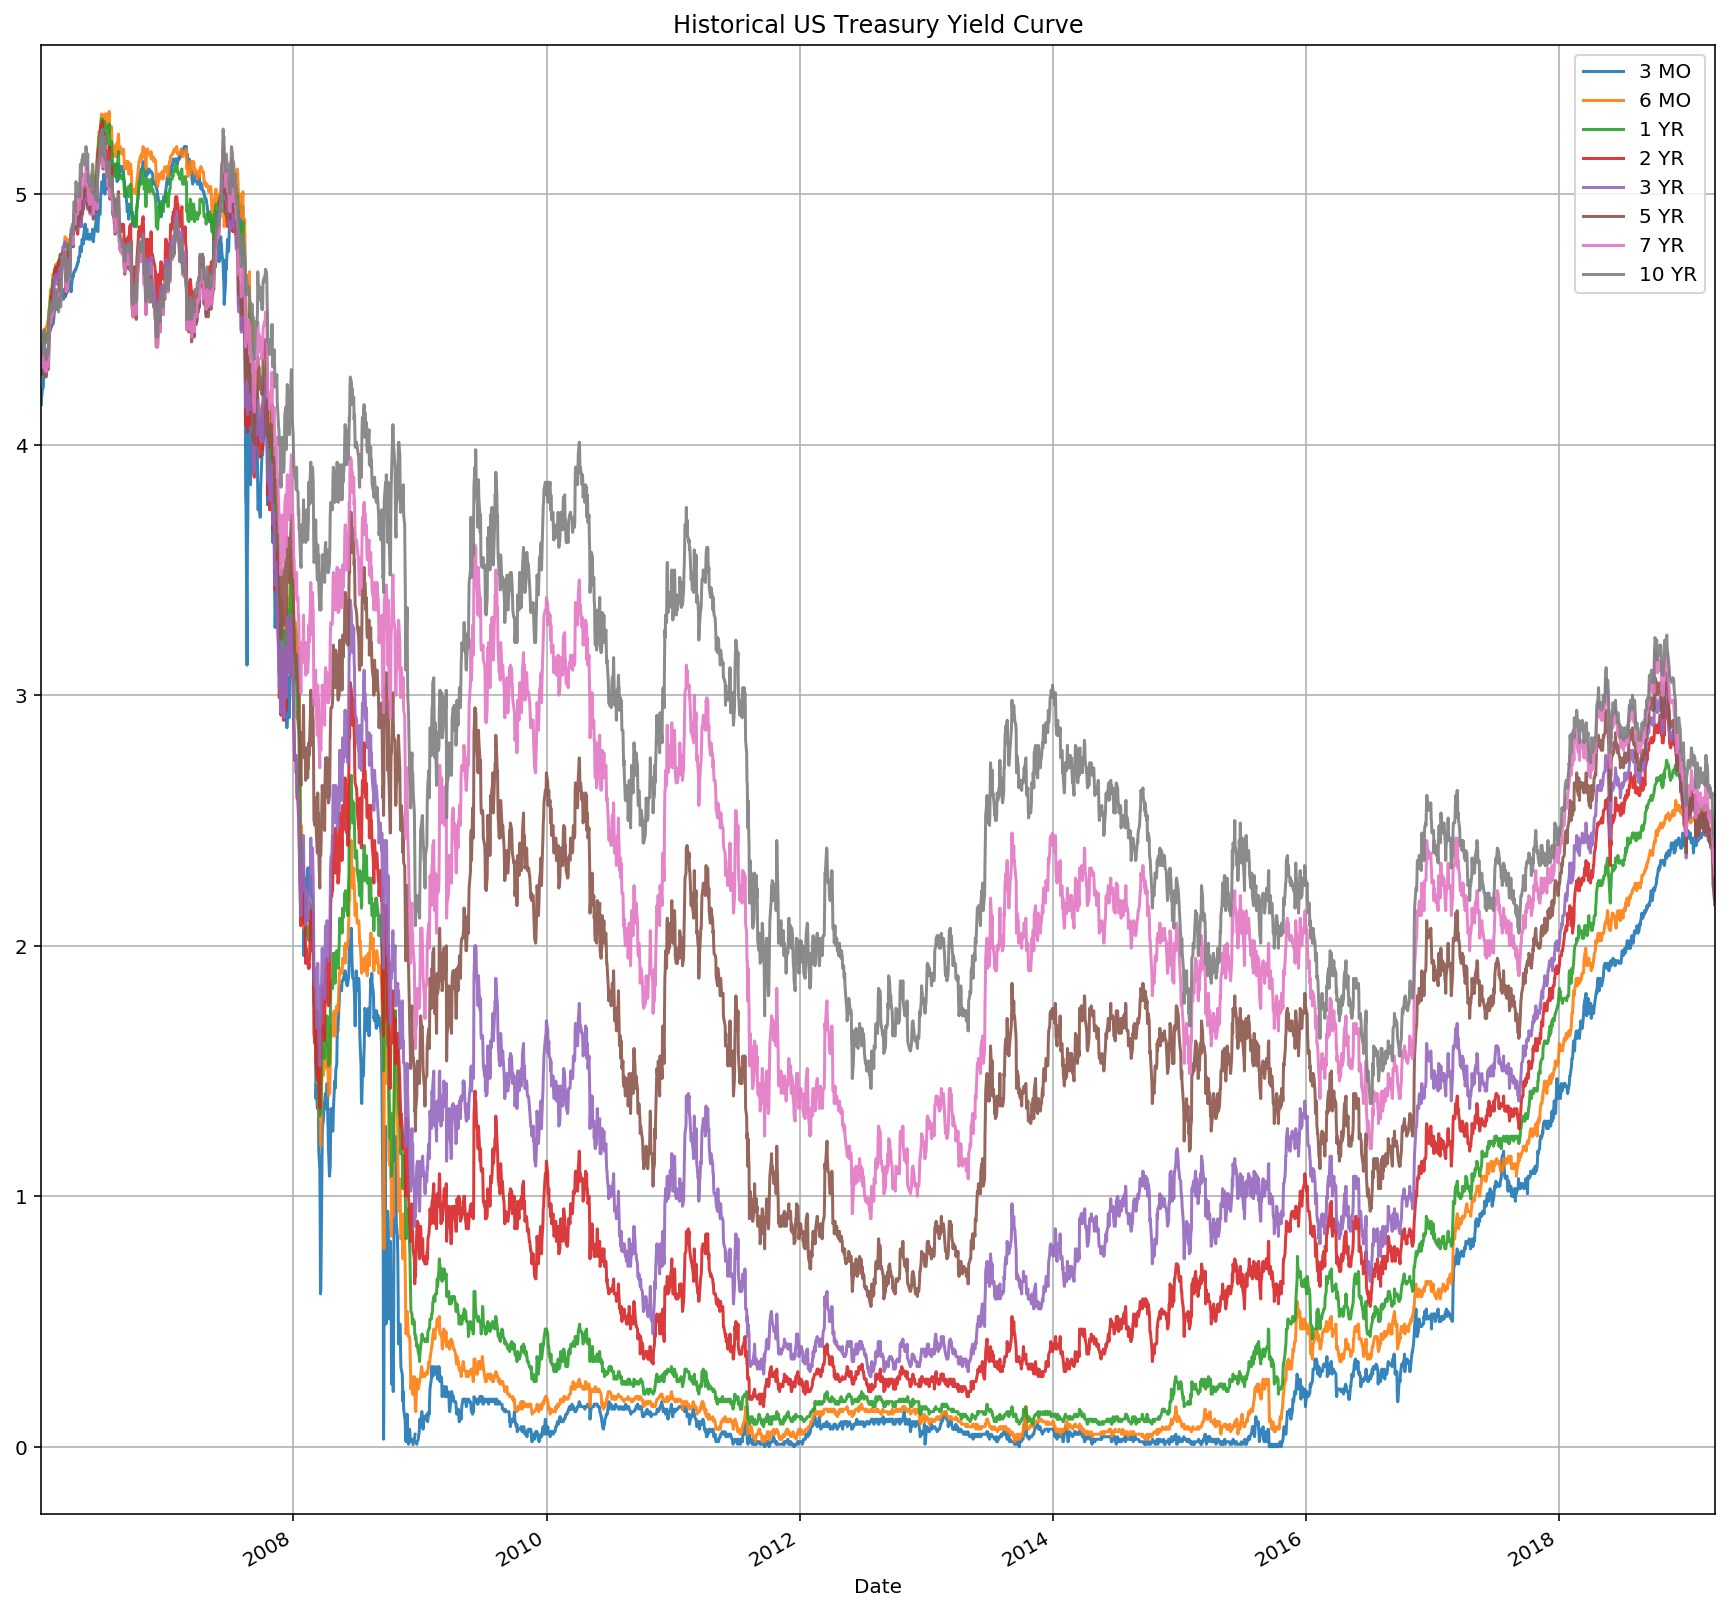

In [62]:
X.plot(figsize=(15,15), title = 'Historical US Treasury Yield Curve', grid=True, alpha=0.9)
plt.savefig('Historical_UST_Yield_Curve.png')

## Interesting things to describe
Is there a better way to do this in 3D?
Is there possible way to do this as a video showing the term structure over time being simulated

## ALSO
Would be interesting to build a Spark Database that shows the yeild curve evolving and the shocks to the principal components below the curve.!!!

### Thought about model
Show latest fed speaches and most common words that are not common in the corpus
Then show the model's forecasted shock to the eighenvectoers
Then show the actual result
 
#Picture this
Select a Fed Speach that occured recentlty
-highlight how different it is from the last Fed speach
-highlight how different it is from the last Federal press conference
-show the model's forecast for interest rates due to this response (maybe include FX rates impact)
-show the actual results
-classify the goodness of fit

Also possibly classify the goodness of fit for the lagged model

In [ ]:
# BELOW IS MASSIVE IMPORT OF CRAP FROM PCA LECTURE

In [63]:
from numpy.linalg import svd, eig
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

In [64]:
X.describe()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR
count,3310.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,1.143752,1.252345,1.342668,1.540643,1.759547,2.215077,2.589713,2.938802
std,1.650751,1.672018,1.619399,1.478271,1.371656,1.193828,1.065508,0.975903
min,0.000000,0.020000,0.080000,0.160000,0.280000,0.560000,0.910000,1.370000
25%,0.060000,0.120000,0.190000,0.470000,0.830000,1.400000,1.880000,2.190000
50%,0.180000,0.310000,0.490000,0.870000,1.270000,1.840000,2.280000,2.710000
75%,1.787500,1.950000,2.120000,2.340000,2.450000,2.730000,3.090000,3.590000
max,5.190000,5.330000,5.300000,5.290000,5.260000,5.230000,5.230000,5.260000


In [74]:
X['3 MO'] = X['3 MO'].fillna(0.0001)

In [77]:
# did I fix the isna check?
test = np.sum(X.isna(), axis=0)
test

3 MO     0
6 MO     0
1 YR     0
2 YR     0
3 YR     0
5 YR     0
7 YR     0
10 YR    0
dtype: int64

In [78]:
n_comp = 5
test = PCA(n_components = n_comp, random_state=44)

In [79]:
test.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=44,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
print("Explained variance: ", test.explained_variance_ratio_)

Explained variance:  [9.56302823e-01 3.85503393e-02 4.27277439e-03 6.12388237e-04
 1.59584389e-04]


<BarContainer object of 5 artists>

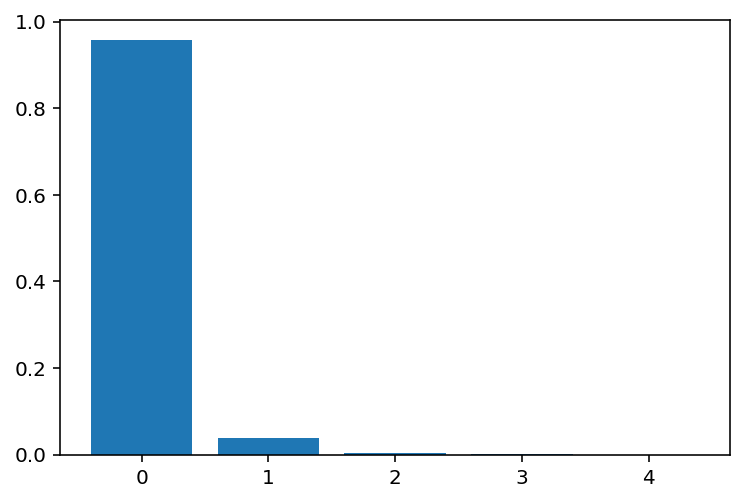

In [81]:
plt_x = np.arange(0, n_comp)
plt.bar(plt_x, test.explained_variance_ratio_)

In [100]:
shocks = test.fit_transform(X)

In [101]:
shocks.shape

(3313, 5)

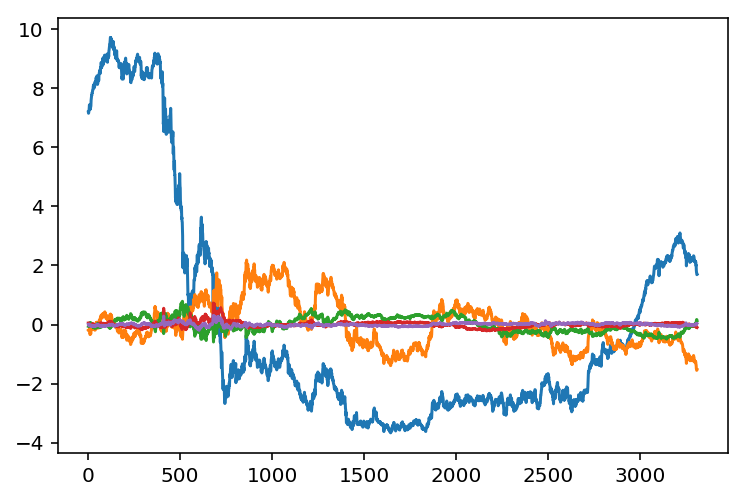

In [102]:
plt.plot(shocks)

In [90]:
parms = test.get_params()
parms

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 5,
 'random_state': 44,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [94]:
comps = test.components_
comps.shape

(5, 8)

Text(0.5, 0.98, 'Principal Components of the US Treasury Yield Curve')

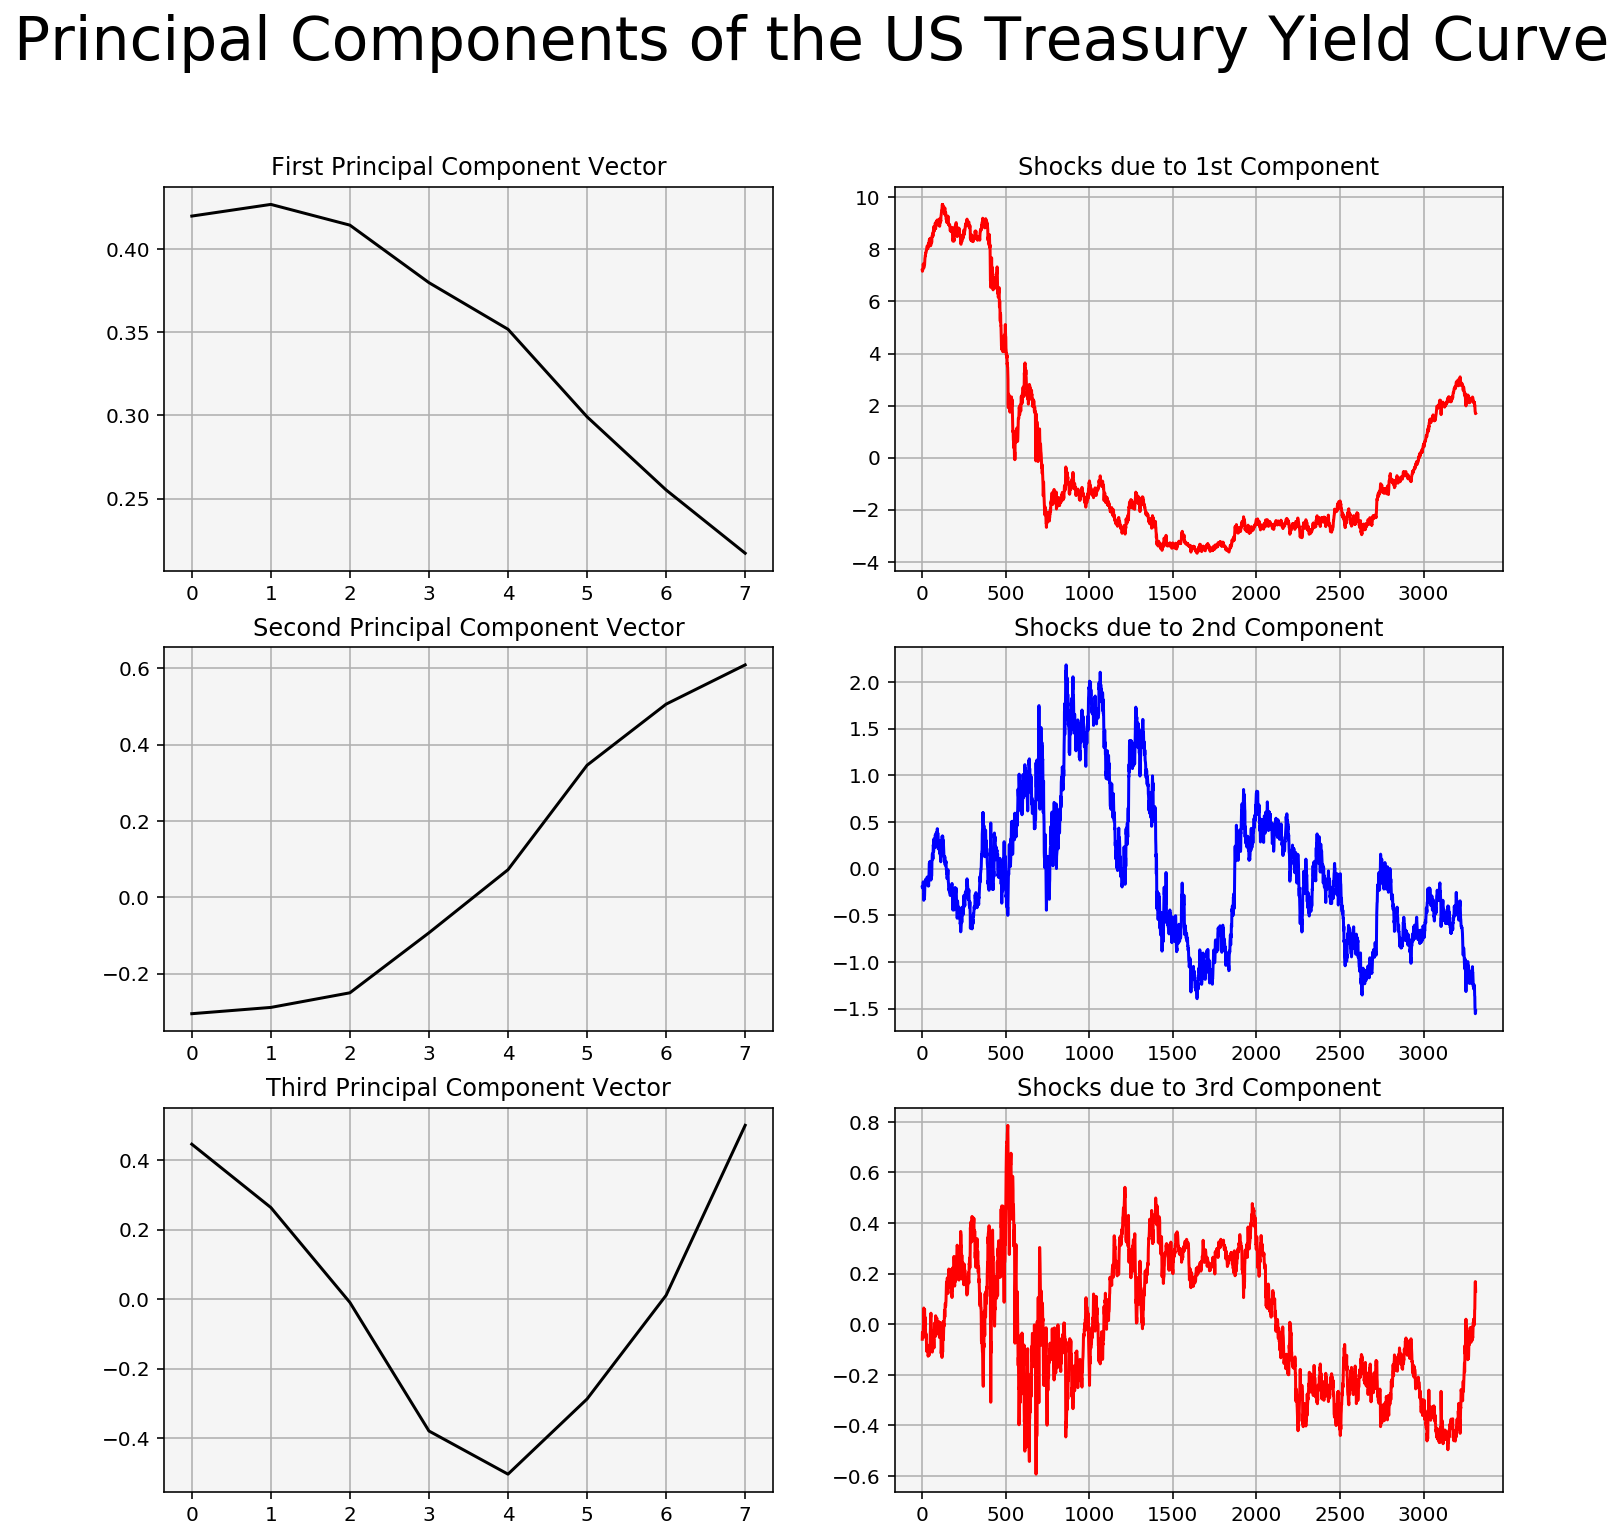

In [117]:
fig, axs = plt.subplots(3,2, figsize = (12,12))

axs[0,0].plot(comps[0, :], color='k')
axs[0,0].grid()
axs[0,0].set_facecolor("whitesmoke")
axs[0,0].set_title("First Principal Component Vector")
axs[0,1].plot(shocks[:,0], color='r')
axs[0,1].grid()
axs[0,1].set_facecolor("whitesmoke")
axs[0,1].set_title("Shocks due to 1st Component")

axs[1,0].plot(comps[1, :], color='k')
axs[1,0].grid()
axs[1,0].set_facecolor("whitesmoke")
axs[1,0].set_title("Second Principal Component Vector")
axs[1,1].plot(shocks[:,1], color='b')
axs[1,1].grid()
axs[1,1].set_facecolor("whitesmoke")
axs[1,1].set_title("Shocks due to 2nd Component")


axs[2,0].plot(comps[2, :], color='k')
axs[2,0].grid()
axs[2,0].set_facecolor("whitesmoke")
axs[2,0].set_title("Third Principal Component Vector")
axs[2,1].plot(shocks[:,2], color='r')
axs[2,1].grid()
axs[2,1].set_facecolor("whitesmoke")
axs[2,1].set_title("Shocks due to 3rd Component")

fig.suptitle("Principal Components of the US Treasury Yield Curve", fontsize = 30, color = 'k')

In [82]:
print("PCA singular values: ", test.singular_values_)

PCA singular values:  [223.14594215  44.80282275  14.91578984   5.64682976   2.8826139 ]


### NEED TO LEARN HOW TO RETURN THE HISTORICAL SHOCKS TO THESE
I am sure there is a method to return these

When we have these,
PLOT THE PRINCIPAL COMPONENT SHOCKS OVER TIME (After normalizing so we can see them)
DO AUTOCORRELATIONS - these should be orthodignal to each other by contstu

## Read the Seaborn documentation to find interesting ways to present this data

## NOW GETTING FX RATES

In [23]:
# daily EUR_USD rates
df_EUR_USD = quandl.get("FED/RXI_US_N_B_EU", authtoken="zBYbsY7fujcHokgXQdsY",
    start_date = "2006-01-01", end_date="2019-03-28")

In [25]:
df_EUR_USD.describe()

,Value
count,3316.000000
mean,1.281354
std,0.125947
min,1.037500
25%,1.169975
50%,1.294800
75%,1.364975
max,1.601000


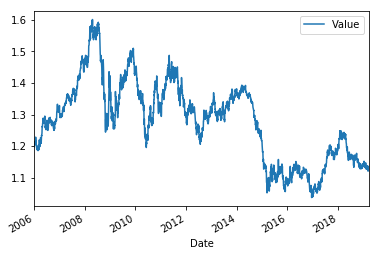

In [26]:
df_EUR_USD.plot()

In [28]:
# daily GBP / USD
df_GBP = quandl.get("FED/RXI_US_N_B_UK", authtoken="zBYbsY7fujcHokgXQdsY",
    start_date = "2006-01-01", end_date="2019-03-28")

In [29]:
df_GBP.describe()

,Value
count,3316.000000
mean,1.590067
std,0.214887
min,1.211800
25%,1.449775
50%,1.571500
75%,1.666600
max,2.110400


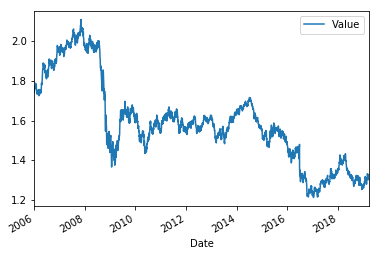

In [30]:
df_GBP.plot()

In [31]:
# daily USD/JPY
df_JPY = quandl.get("FED/RXI_N_B_JA", authtoken="zBYbsY7fujcHokgXQdsY",
    start_date = "2006-01-01", end_date="2019-03-28")

In [32]:
df_JPY.describe()

,Value
count,3316.000000
mean,102.741414
std,13.802878
min,75.720000
25%,91.685000
50%,105.490000
75%,113.782500
max,125.580000


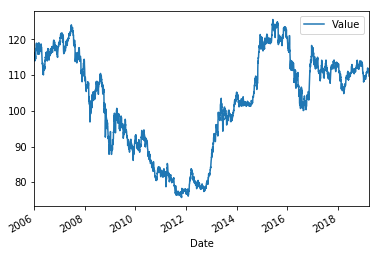

In [33]:
df_JPY.plot()

In [34]:
df_JPY.head()

,Value
Date,
2006-01-03,116.34
2006-01-04,116.31
2006-01-05,115.96
2006-01-06,114.45
2006-01-09,114.66


In [35]:
df_GBP.head()

,Value
Date,
2006-01-03,1.7404
2006-01-04,1.7588
2006-01-05,1.7566
2006-01-06,1.7697
2006-01-09,1.7645


In [36]:
df_EUR_USD.head()

,Value
Date,
2006-01-03,1.1980
2006-01-04,1.2091
2006-01-05,1.2101
2006-01-06,1.2148
2006-01-09,1.2064


In [38]:
df_treas.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2006-01-03,4.05,NaN,4.16,4.40,4.38,4.34,4.30,4.30,4.32,4.37,4.62,NaN
2006-01-04,4.03,NaN,4.19,4.37,4.35,4.31,4.28,4.28,4.31,4.36,4.60,NaN
2006-01-05,4.05,NaN,4.20,4.37,4.36,4.32,4.29,4.29,4.31,4.36,4.61,NaN
2006-01-06,4.06,NaN,4.22,4.39,4.38,4.36,4.32,4.32,4.33,4.38,4.63,NaN
2006-01-09,4.09,NaN,4.23,4.40,4.39,4.36,4.32,4.32,4.34,4.38,4.63,NaN


In [41]:
df_treas.iloc[100:200]

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2006-05-26,4.75,NaN,4.84,5.02,5.00,4.96,4.94,4.95,4.97,5.06,5.30,5.16
2006-05-30,4.76,NaN,4.84,5.04,5.02,4.99,4.99,4.99,5.01,5.09,5.33,5.19
2006-05-31,4.75,NaN,4.86,5.08,5.07,5.04,5.03,5.04,5.06,5.12,5.35,5.21
2006-06-01,4.75,NaN,4.83,5.06,5.05,5.04,5.02,5.03,5.05,5.11,5.34,5.20
2006-06-02,4.75,NaN,4.81,5.01,4.98,4.92,4.91,4.90,4.92,5.00,5.24,5.10
2006-06-05,4.77,NaN,4.85,5.04,5.02,4.99,4.95,4.95,4.97,5.02,5.24,5.10
2006-06-06,4.80,NaN,4.86,5.05,5.03,4.99,4.96,4.95,4.96,5.01,5.22,5.08
2006-06-07,4.80,NaN,4.86,5.06,5.05,5.02,4.99,4.97,4.98,5.02,5.23,5.09
2006-06-08,4.78,NaN,4.87,5.06,5.04,5.01,4.97,4.95,4.96,5.00,5.20,5.06


In [43]:
df_treas.loc[pd.isna(df["3 MO"]), :].index

DatetimeIndex(['2008-12-10', '2008-12-18', '2008-12-24'], dtype='datetime64[ns]', name='Date', freq=None)

In [56]:
df_treas.iloc[720:750]

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2008-11-14,0.06,NaN,0.15,0.90,1.14,1.22,1.53,2.33,2.94,3.72,4.43,4.22
2008-11-17,0.06,NaN,0.12,0.81,1.08,1.22,1.53,2.32,2.92,3.68,4.42,4.20
2008-11-18,0.10,NaN,0.12,0.76,1.05,1.15,1.44,2.22,2.79,3.53,4.32,4.14
2008-11-19,0.09,NaN,0.07,0.66,0.97,1.09,1.36,2.08,2.64,3.38,4.17,3.96
2008-11-20,0.05,NaN,0.03,0.52,0.87,1.00,1.20,1.94,2.43,3.10,3.87,3.64
2008-11-21,0.03,NaN,0.02,0.45,0.83,1.09,1.35,2.02,2.53,3.20,3.93,3.70
2008-11-24,0.01,NaN,0.13,0.54,0.95,1.31,1.53,2.24,2.71,3.35,4.01,3.78
2008-11-25,0.04,NaN,0.10,0.53,0.95,1.15,1.41,2.06,2.49,3.11,3.85,3.63
2008-11-26,0.02,NaN,0.05,0.48,0.93,1.09,1.38,2.01,2.43,2.99,3.77,3.54


In [55]:
df_treas['3 MO'] = df_treas['3 MO'].fillna(0)